<a href="https://colab.research.google.com/github/ebereinyiama/ADS-Assignment1/blob/main/Group_41_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers, datasets
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the data
data_Train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Group_Project_Data/Train",
    image_size=(64, 64),
    color_mode="grayscale"
)

Found 6000 files belonging to 2 classes.


In [ ]:
# loading the data
data_Valid = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Group_Project_Data/Valid",
    image_size=(64, 64),
    color_mode="grayscale"
)

Found 2000 files belonging to 2 classes.


In [ ]:
# scaling the data
data_Train = data_Train.map(lambda x,y: (x/255, y))

In [ ]:
data_Valid = data_Valid.map(lambda x,y: (x/255, y))

In [ ]:
train_size = int(len(data_Train))
val_size = int(len(data_Valid))

In [ ]:
train = data_Train.take(train_size)
val = data_Valid.take(val_size)

In [ ]:
image_model = tf.keras.Sequential([
    layers.Conv2D(32, 3, activation="relu", padding="same", input_shape=(64, 64, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
image_model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
image_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",  # Stop training when validation loss does not improve
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore the best model weights when training stops
)

In [ ]:
history = image_model.fit(
    train, 
    epochs=10,
    validation_data=val,
    callbacks=[early_stopping],
)

Epoch 1/10
188/188 [==============================] - 455s 2s/step - loss: 0.0917 - accuracy: 0.9592 - val_loss: 0.0177 - val_accuracy: 0.9925
Epoch 2/10
188/188 [==============================] - 5s 26ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0046 - val_accuracy: 0.9980
Epoch 3/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 4/10
188/188 [==============================] - 5s 26ms/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.0052 - val_accuracy: 0.9975
Epoch 5/10
188/188 [==============================] - 6s 29ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 6/10
188/188 [==============================] - 5s 26ms/step - loss: 5.4152e-04 - accuracy: 0.9998 - val_loss: 0.0041 - val_accuracy: 0.9985
Epoch 7/10
188/188 [==============================] - 5s 27ms/step - loss: 7.7533e-04 - accuracy: 0.9997 - val_loss: 0.0030 - val_accuracy

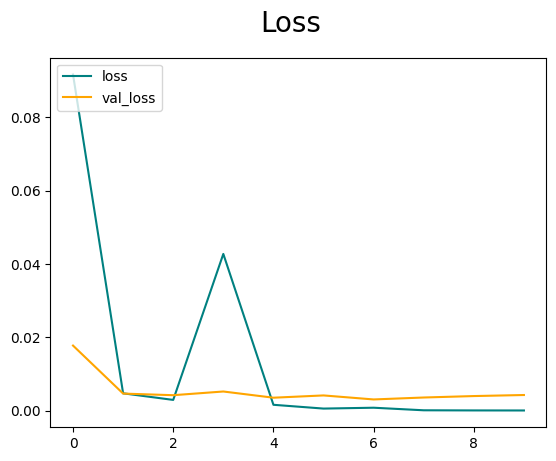

In [ ]:
#plotting the loss
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

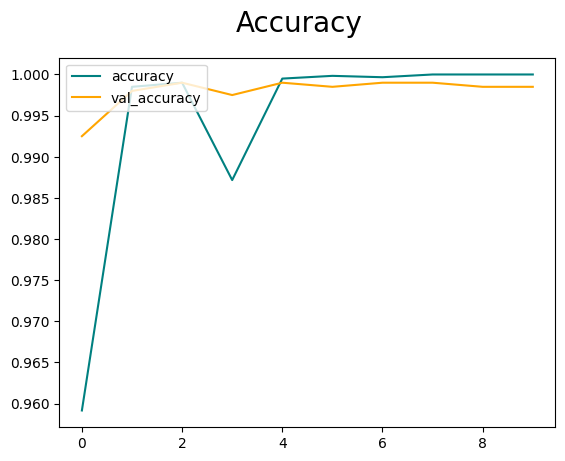

In [ ]:
#plotting the accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# To evaluate performance
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
# to evaluate performance on a test data
# test is the test data 

for batch in test.as_numpy_iterator(): 
    X, y = batch
    test_img = image_model.predict(X)
    pre.update_state(y, test_img)
    re.update_state(y, test_img)
    acc.update_state(y, test_img)

In [ ]:
#Testing on a new image
#img is the test image
# there is no test image yet, this code will work only when  we provide the new test image
resize = tf.image.resize(img, (64,64))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
test_img = image_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
# the given image will fake if test_img > 0.5 otherwise it will be real
if test_img > 0.5: 
    print(f'Predicted class is Fake')
else:
    print(f'Predicted class is Real')

In [ ]:
# saving the model

image_model.save(os.path.join('models','imageclassifier.h5')) #h5 helps to store the model as a zip file.

In [ ]:
# creating a log directory for training
logdir='logs'

In [ ]:
# creating a call back
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = image_model.fit(
    train, 
    epochs=10,
    validation_data=val,
    callbacks=[tensorboard_callback, early_stopping]
)

Epoch 1/10
188/188 [==============================] - 7s 34ms/step - loss: 0.0332 - accuracy: 0.9918 - val_loss: 0.0152 - val_accuracy: 0.9970
Epoch 2/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.0140 - val_accuracy: 0.9980
Epoch 3/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0749 - val_accuracy: 0.9795
Epoch 4/10
188/188 [==============================] - 6s 30ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.0146 - val_accuracy: 0.9980
Epoch 5/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 6/10
188/188 [==============================] - 6s 30ms/step - loss: 0.0134 - accuracy: 0.9960 - val_loss: 0.0033 - val_accuracy: 0.9990
Epoch 7/10
188/188 [==============================] - 5s 28ms/step - loss: 0.0014 - accuracy: 0.9993 - val_loss: 0.0015 - val_accuracy: 0.9990

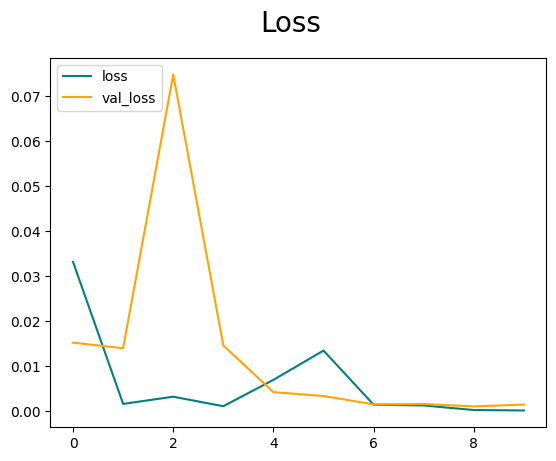

In [ ]:
#plotting the loss
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

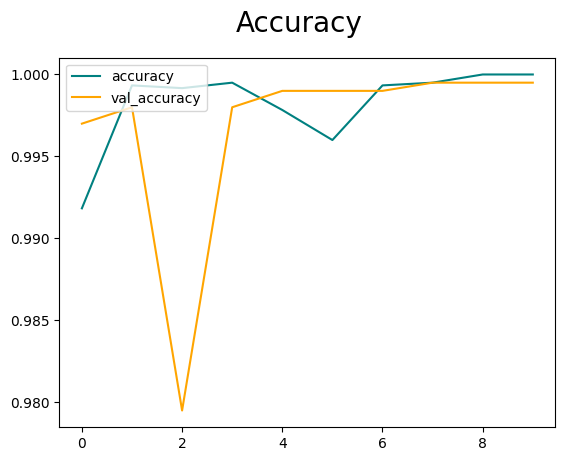

In [ ]:
#plotting the accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
image2_model = tf.keras.Sequential([
    layers.Conv2D(32, 3, activation="relu", padding="same", kernel_regularizer=regularizers.l2(0.001), input_shape=(64, 64, 1)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, activation="relu", padding="same", kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(128, 3, activation="relu", padding="same", kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
image2_model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
image2_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 16, 16, 64)      

In [ ]:
history = image2_model.fit(
    train, 
    epochs=10,
    validation_data=val,
    callbacks=[early_stopping],
)

Epoch 1/10
188/188 [==============================] - 9s 37ms/step - loss: 0.1959 - accuracy: 0.9653 - val_loss: 0.0788 - val_accuracy: 0.9965
Epoch 2/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0595 - accuracy: 0.9983 - val_loss: 0.0799 - val_accuracy: 0.9915
Epoch 3/10
188/188 [==============================] - 6s 29ms/step - loss: 0.0515 - accuracy: 0.9968 - val_loss: 0.1101 - val_accuracy: 0.9785
Epoch 4/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0404 - accuracy: 0.9987 - val_loss: 0.0373 - val_accuracy: 0.9980
Epoch 5/10
188/188 [==============================] - 6s 31ms/step - loss: 0.0353 - accuracy: 0.9983 - val_loss: 0.0458 - val_accuracy: 0.9975
Epoch 6/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0562 - accuracy: 0.9927 - val_loss: 0.0348 - val_accuracy: 0.9990
Epoch 7/10
188/188 [==============================] - 6s 29ms/step - loss: 0.0300 - accuracy: 0.9993 - val_loss: 0.0272 - val_accuracy: 0.9990

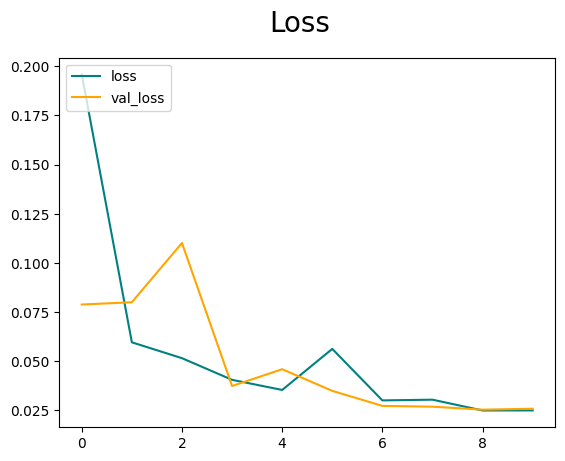

In [ ]:
#plotting the loss
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

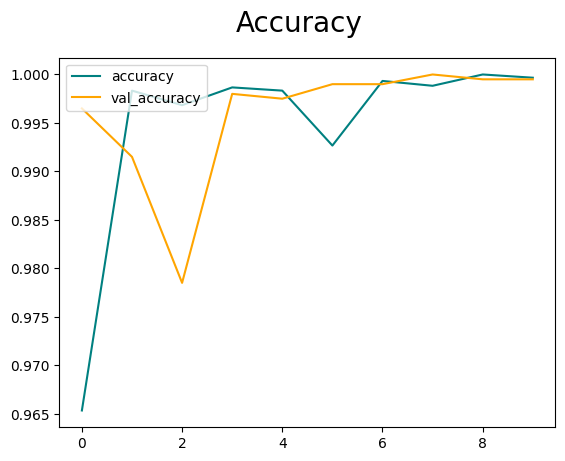

In [ ]:
#plotting the accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
image3_model = tf.keras.Sequential([
    layers.Conv2D(32, 3, activation="relu", padding="same", kernel_regularizer=regularizers.l2(0.001), input_shape=(64, 64, 1)),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(64, 3, activation="relu", padding="same", kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(128, 3, activation="relu", padding="same", kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.25),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
image3_model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
history = image3_model.fit(
    train, 
    epochs=10,
    validation_data=val,
    callbacks=[early_stopping],
)

Epoch 1/10
188/188 [==============================] - 9s 35ms/step - loss: 0.2488 - accuracy: 0.9307 - val_loss: 0.0847 - val_accuracy: 0.9955
Epoch 2/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0801 - accuracy: 0.9937 - val_loss: 0.0865 - val_accuracy: 0.9940
Epoch 3/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0507 - accuracy: 0.9985 - val_loss: 0.0518 - val_accuracy: 0.9975
Epoch 4/10
188/188 [==============================] - 6s 30ms/step - loss: 0.0481 - accuracy: 0.9978 - val_loss: 0.0545 - val_accuracy: 0.9975
Epoch 5/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0423 - accuracy: 0.9992 - val_loss: 0.0363 - val_accuracy: 0.9990
Epoch 6/10
188/188 [==============================] - 6s 31ms/step - loss: 0.0359 - accuracy: 0.9992 - val_loss: 0.0341 - val_accuracy: 0.9990
Epoch 7/10
188/188 [==============================] - 5s 28ms/step - loss: 0.0366 - accuracy: 0.9987 - val_loss: 0.0360 - val_accuracy: 0.9980

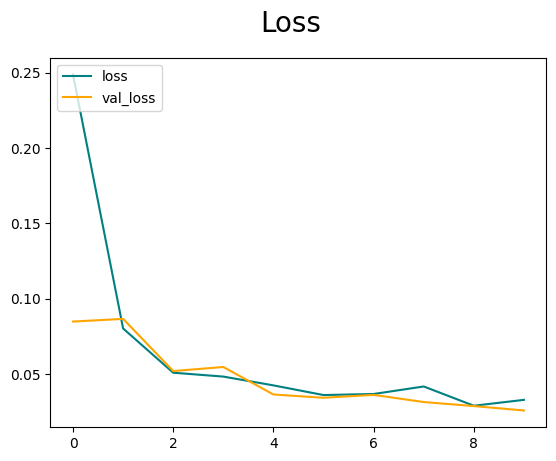

In [ ]:
#plotting the loss
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

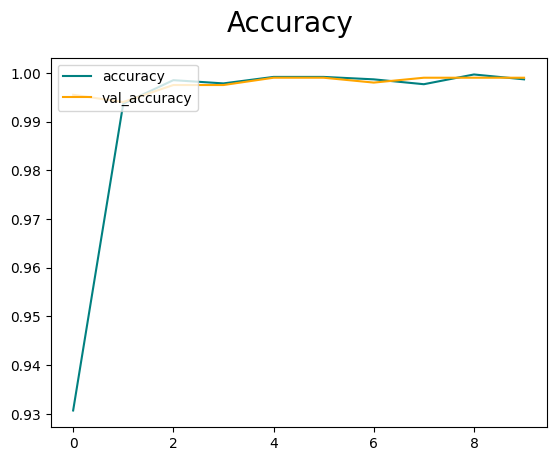

In [ ]:
#plotting the accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
def reinitialize(model):
    # Loop over the layers of the model
    for l in model.layers:
        # Check if the layer has initializers
        if hasattr(l,"kernel_initializer"):
            # Reset the kernel weights
            l.kernel.assign(l.kernel_initializer(tf.shape(l.kernel)))
        if hasattr(l,"bias_initializer"):
            # Reset the bias
            l.bias.assign(l.bias_initializer(tf.shape(l.bias)))

In [ ]:
# Define different batch sizes to try
batch_sizes = [32, 64, 128, 256, 512]

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


188/188 [==============================] - 8s 31ms/step - loss: 0.0852 - accuracy: 0.9600 - val_loss: 0.0167 - val_accuracy: 0.9955
Epoch 2/50
188/188 [==============================] - 5s 28ms/step - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0166 - val_accuracy: 0.9980
Epoch 3/50
188/188 [==============================] - 6s 31ms/step - loss: 0.0719 - accuracy: 0.9755 - val_loss: 0.0283 - val_accuracy: 0.9950
Epoch 4/50
188/188 [==============================] - 5s 27ms/step - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.0255 - val_accuracy: 0.9955
Epoch 5/50
188/188 [==============================] - 6s 29ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0278 - val_accuracy: 0.9975


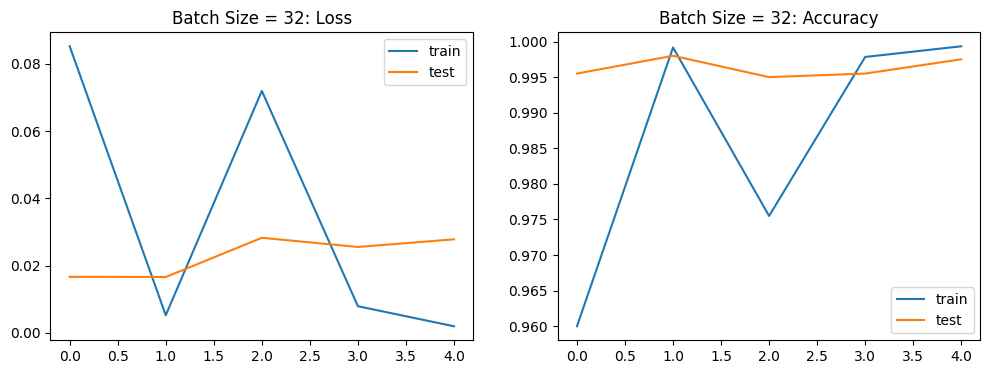

Epoch 1/50
188/188 [==============================] - 8s 35ms/step - loss: 0.0936 - accuracy: 0.9582 - val_loss: 0.0185 - val_accuracy: 0.9955
Epoch 2/50
188/188 [==============================] - 5s 27ms/step - loss: 0.0344 - accuracy: 0.9897 - val_loss: 0.0114 - val_accuracy: 0.9980
Epoch 3/50
188/188 [==============================] - 5s 27ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0194 - val_accuracy: 0.9970
Epoch 4/50
188/188 [==============================] - 6s 29ms/step - loss: 6.7303e-04 - accuracy: 0.9998 - val_loss: 0.0184 - val_accuracy: 0.9980
Epoch 5/50
188/188 [==============================] - 5s 27ms/step - loss: 0.0127 - accuracy: 0.9967 - val_loss: 0.0555 - val_accuracy: 0.9875


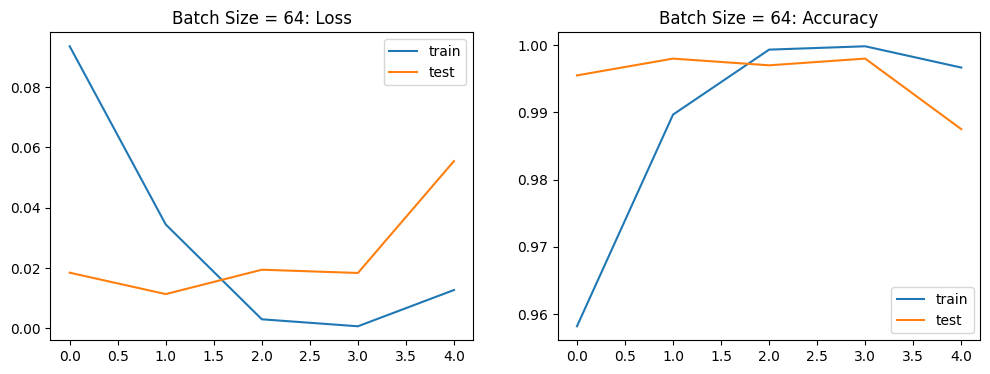

Epoch 1/50
188/188 [==============================] - 7s 27ms/step - loss: 0.0839 - accuracy: 0.9622 - val_loss: 0.0182 - val_accuracy: 0.9955
Epoch 2/50
188/188 [==============================] - 6s 30ms/step - loss: 0.0163 - accuracy: 0.9958 - val_loss: 0.0101 - val_accuracy: 0.9980
Epoch 3/50
188/188 [==============================] - 5s 26ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0113 - val_accuracy: 0.9980
Epoch 4/50
188/188 [==============================] - 7s 34ms/step - loss: 0.0026 - accuracy: 0.9990 - val_loss: 0.0108 - val_accuracy: 0.9980
Epoch 5/50
188/188 [==============================] - 5s 28ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.0091 - val_accuracy: 0.9975
Epoch 6/50
188/188 [==============================] - 5s 27ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0140 - val_accuracy: 0.9970
Epoch 7/50
188/188 [==============================] - 6s 31ms/step - loss: 0.0019 - accuracy: 0.9990 - val_loss: 0.0088 - val_accuracy: 0.9980

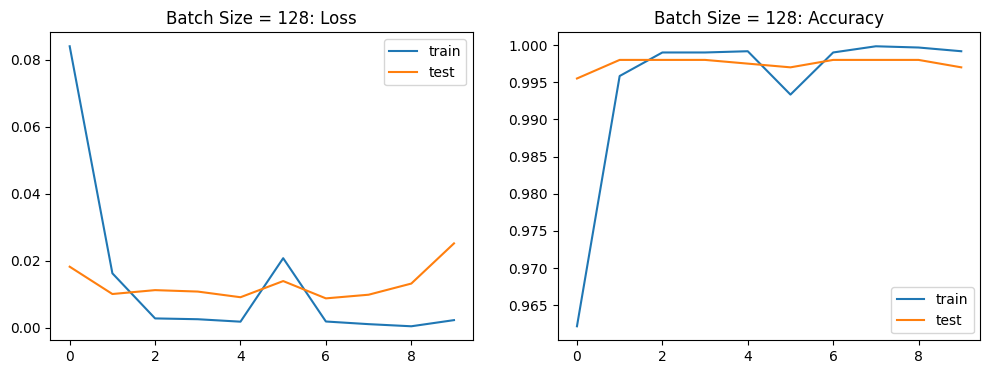

Epoch 1/50
188/188 [==============================] - 7s 27ms/step - loss: 0.1085 - accuracy: 0.9505 - val_loss: 0.0345 - val_accuracy: 0.9890
Epoch 2/50
188/188 [==============================] - 7s 36ms/step - loss: 0.0214 - accuracy: 0.9953 - val_loss: 0.0248 - val_accuracy: 0.9945
Epoch 3/50
188/188 [==============================] - 5s 27ms/step - loss: 0.0048 - accuracy: 0.9978 - val_loss: 0.0143 - val_accuracy: 0.9975
Epoch 4/50
188/188 [==============================] - 5s 28ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0103 - val_accuracy: 0.9980
Epoch 5/50
188/188 [==============================] - 5s 27ms/step - loss: 0.0087 - accuracy: 0.9980 - val_loss: 0.0131 - val_accuracy: 0.9975
Epoch 6/50
188/188 [==============================] - 5s 27ms/step - loss: 0.0528 - accuracy: 0.9857 - val_loss: 0.0221 - val_accuracy: 0.9950
Epoch 7/50
188/188 [==============================] - 6s 29ms/step - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.0219 - val_accuracy: 0.9950

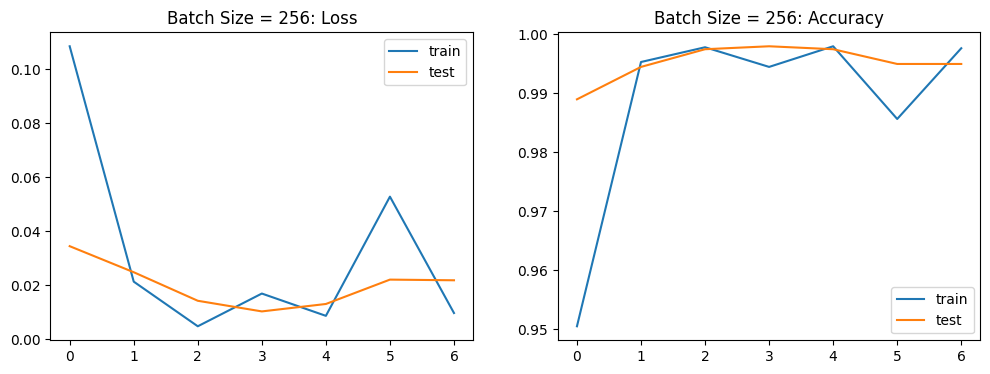

Epoch 1/50
188/188 [==============================] - 7s 28ms/step - loss: 0.0936 - accuracy: 0.9542 - val_loss: 0.0161 - val_accuracy: 0.9975
Epoch 2/50
188/188 [==============================] - 6s 29ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0099 - val_accuracy: 0.9975
Epoch 3/50
188/188 [==============================] - 6s 28ms/step - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.0225 - val_accuracy: 0.9970
Epoch 4/50
188/188 [==============================] - 5s 28ms/step - loss: 0.1402 - accuracy: 0.9495 - val_loss: 0.0253 - val_accuracy: 0.9965
Epoch 5/50
188/188 [==============================] - 6s 31ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.0297 - val_accuracy: 0.9955


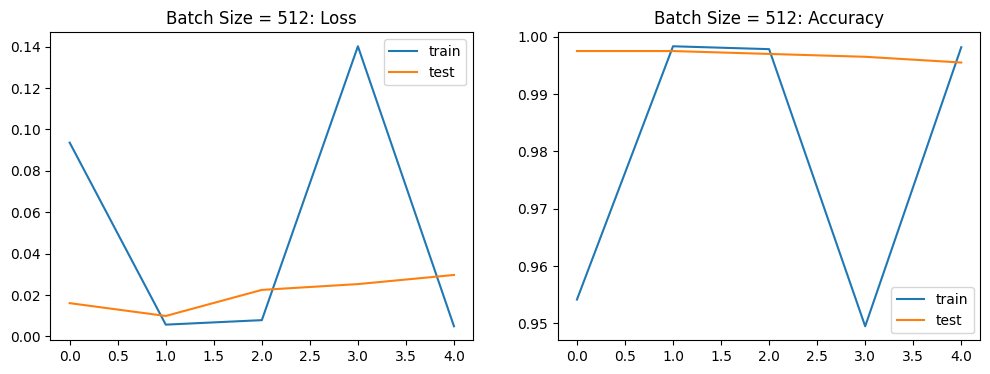

In [ ]:
# Training the model with SGD optimizer for each batch size and storing the results
histories = []
for batch_size in batch_sizes:
    # Resetting the model weights
    reinitialize(image_model)

    # Compiling the model with SGD optimizer
    image_model.compile(optimizer='Adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

    # Train the model with early stopping callback
    history = image_model.fit(train, batch_size=batch_size, epochs=50, validation_data=val, callbacks=[early_stopping])
    histories.append(history)

# Plotting the training and validation losses for each batch size

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Batch Size = ' + str(batch_size) + ': Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Batch Size = ' + str(batch_size) + ': Accuracy')
    plt.legend()
    plt.show()

In [ ]:
# Define the learning rates to test
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Define the optimizers to test
optimizers = ['sgd', 'adam', 'rmsprop']

# Loop over the learning rates and optimizers
for lr in learning_rates:
    for opt in optimizers:
        # Reinitialize the model
        reinitialize(image_model)
        # Compile the model with the current optimizer and learning rate
        image_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        # Train the model for 10 epochs with a batch size of 128
        history = image_model.fit(train, validation_data=val, epochs=10, batch_size=128)
        # Print the final accuracy
        print(f'Optimizer: {opt}, Learning Rate: {lr}, Test Accuracy: {history.history["val_accuracy"][-1]:.4f}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


188/188 [==============================] - 7s 31ms/step - loss: nan - accuracy: 0.5013 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/10
188/188 [==============================] - 5s 27ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/10
188/188 [==============================] - 7s 35ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/10
188/188 [==============================] - 5s 27ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 5/10
188/188 [==============================] - 5s 27ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 6/10
188/188 [==============================] - 6s 29ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 7/10
188/188 [==============================] - 5s 26ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 8/10
188/188 [==============================] 